# 11장. 모델 평가

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/ml-with-python-cookbook-2nd/blob/main/ch11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import seaborn as sns

print('numpy', np.__version__)
print('pandas', pd.__version__)
print('sklearn', sklearn.__version__)
print('matplotlib', matplotlib.__version__)
print('sns', sns.__version__)

numpy 1.25.2
pandas 1.5.3
sklearn 1.2.2
matplotlib 3.7.1
sns 0.13.1


## 11.1 교차검증 모델

In [2]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 숫자 데이터셋을 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 만듭니다.
features = digits.data

# 타깃 벡터를 만듭니다.
target = digits.target

# 표준화 객체를 만듭니다.
standardizer = StandardScaler()

# 로지스틱 회귀 객체를 만듭니다.
logit = LogisticRegression()

# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)

# k-폴드 교차검증을 만듭니다.
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# k-폴드 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
cv_results.mean()

0.969958217270195

In [3]:
# 5개 폴드의 점수를 모두 확인하기
cv_results

array([0.96111111, 0.96388889, 0.98050139, 0.97214485, 0.97214485])

In [4]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# 훈련 세트로 standardizer의 fit 메서드를 호출합니다.
standardizer.fit(features_train)

# 훈련 세트와 테스트 세트에 모두 적용합니다.
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

In [5]:
# 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)

In [6]:
# k-폴드 교차 검증 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차검증
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

### 붙임

In [7]:
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit 분할기를 만듭니다.
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=ss, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
cv_results.mean()

0.9630555555555554

In [8]:
from sklearn.model_selection import RepeatedKFold

# RepeatedKFold 분할기를 만듭니다.
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=rfk, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 검증 점수 개수를 확인합니다.
len(cv_results)

50

## 11.2 기본 회귀 모델 만들기

In [9]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import load_wine
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# 데이터를 로드합니다.
wine = load_wine()

# 특성을 만듭니다.
features, target = wine.data, wine.target

# 흔련 세트와 테스트 세트를 나눕니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)

# 더미 회귀 모델을 만듭니다.
dummy = DummyRegressor(strategy='mean')

# 더미 회귀 모델을 훈련합니다.
dummy.fit(features_train, target_train)

# R^2 점수를 계산합니다.
dummy.score(features_test, target_test)

-0.0480213580840978

In [10]:
# 라이브러리를 임포트합니다.
from sklearn.linear_model import LinearRegression

# 간단한 선형 회귀 모델을 훈련합니다.
ols = LinearRegression()
ols.fit(features_train, target_train)

# R^2 점수를 계산합니다.
ols.score(features_test, target_test)

0.804353263176954

In [11]:
# 모든 샘플에 대해 1로 예측하는 더미 회귀 모델을 만듭니다.
clf = DummyRegressor(strategy='constant', constant=1)
clf.fit(features_train, target_train)

# 점수를 계산합니다.
clf.score(features_test, target_test)

-0.06299212598425186

### 붙임

In [12]:
clf = DummyRegressor(strategy='quantile', quantile=1.0)
clf.fit(features_train, target_train)

# 훈련 세트 타깃의 최대값으로 예측합니다.
clf.predict(features_test)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [13]:
import numpy as np
# 훈련 세트의 타깃에서 최댓값을 확인합니다.
np.max(target_train)

2

## 11.3 기본 분류 모델 만들기

In [14]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# 데이터를 로드합니다.
iris = load_iris()

# 타깃 벡터와 특성 행렬을 만듭니다.
features, target = iris.data, iris.target

# 훈련 세트와 테스트 세트로 나눕니다.
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

# 더미 분류 모델을 만듭니다.
dummy = DummyClassifier(strategy='uniform', random_state=1)

# 모델을 훈련합니다.
dummy.fit(features_train, target_train)

# 정확도 점수를 계산합니다.
dummy.score(features_test, target_test)

0.42105263157894735

In [15]:
# 라이브러리를 임포트합니다.
from sklearn.ensemble import RandomForestClassifier

# 분류 모델을 만듭니다.
classifier = RandomForestClassifier()

# 모델을 훈련합니다.
classifier.fit(features_train, target_train)

# 정확도 점수를 계산합니다.
classifier.score(features_test, target_test)

0.9736842105263158

### 붙임

In [16]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(features_train, target_train)

# 훈련 세트 타깃에서 가장 많은 값으로 예측합니다.
dummy.predict(features_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
# 훈련 세트의 타깃 개수를 확인합니다.
np.bincount(target_train)

array([37, 34, 41])

## 11.4 이진 분류기의 예측 평가

In [18]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 만듭니다.
X, y = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 1)

# 로지스틱 회귀 모델을 만듭니다.
logit = LogisticRegression()

# 정확도를 사용하여 교차검증을 수행합니다.
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [19]:
# 정밀도를 사용한 교차검증
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [20]:
# 재현율을 사용한 교차검증
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [21]:
# f1 점수를 사용한 교차검증
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [22]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)

# 테스트 세트의 예측을 만듭니다.
y_hat = logit.fit(X_train, y_train).predict(X_test)

# 정확도를 계산합니다.
accuracy_score(y_test, y_hat)

0.947

### 붙임

In [23]:
from sklearn.model_selection import cross_validate

# 정확도와 정밀도를 사용한 교차검증
cross_validate(logit, X, y, scoring=["accuracy", "precision"])

{'fit_time': array([0.07006717, 0.09515595, 0.058465  , 0.08270597, 0.07622123]),
 'score_time': array([0.00496483, 0.01295161, 0.03468657, 0.01108766, 0.01436067]),
 'test_accuracy': array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ]),
 'test_precision': array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])}

## 11.5 이진 분류기 임계값 평가하기

In [24]:
import matplotlib.pyplot as plt

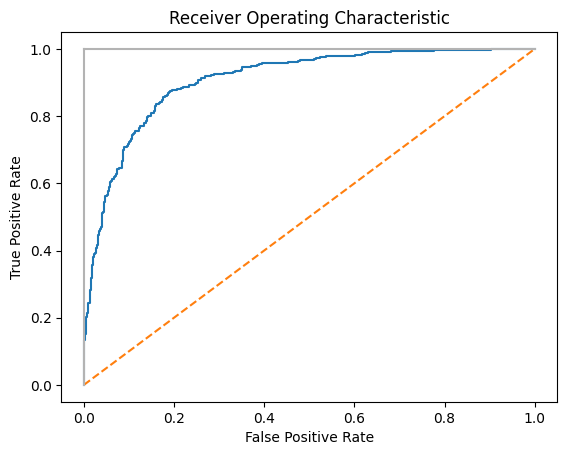

In [25]:
# 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

# 훈련 세트와 테스트 세트로 나눕니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# 분류기를 만듭니다.
logit = LogisticRegression()

# 모델을 훈련합니다.
logit.fit(features_train, target_train)

# 예측 확률을 계산합니다.
target_probabilities = logit.predict_proba(features_test)[:,1]

# 진짜 양성 비율과 거짓 양성 비율을 계산합니다.
false_positive_rate, true_positive_rate, threshold = roc_curve(
  target_test,
  target_probabilities
)

# ROC 곡선을 그립니다.
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [26]:
# 예측 확률을 계산합니다.
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

In [27]:
logit.classes_

array([0, 1])

In [28]:
print("임계값:", threshold[124])
print("진짜 양성 비율:", true_positive_rate[124])
print("거짓 양성 비율:", false_positive_rate[124])

임계값: 0.5008252732632009
진짜 양성 비율: 0.8346938775510204
거짓 양성 비율: 0.1607843137254902


In [29]:
print("임계값:", threshold[49])
print("진짜 양성 비율:", true_positive_rate[49])
print("거짓 양성 비율:", false_positive_rate[49])

임계값: 0.8058575028551825
진짜 양성 비율: 0.5653061224489796
거짓 양성 비율: 0.052941176470588235


In [30]:
# ROC 곡선 아래 면적을 계산합니다.
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

### 붙임

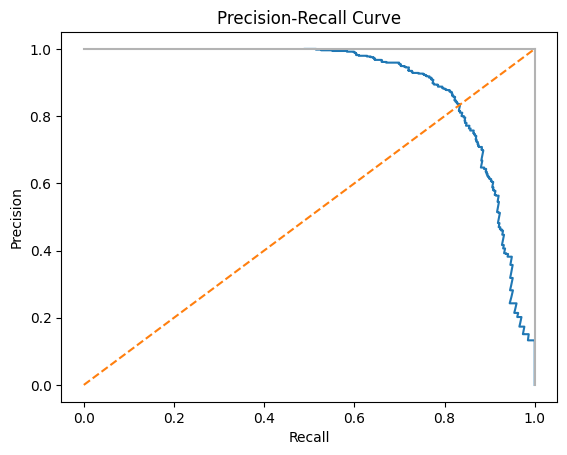

In [31]:
from sklearn.metrics import precision_recall_curve

# 진짜 양성 비율과 거짓 양성 비율을 계산합니다.
precision, recall, threshold = precision_recall_curve(
    target_test, target_probabilities)

# ROC 곡선을 그립니다.
plt.title("Precision-Recall Curve")
plt.plot(precision, recall)
plt.plot([0, 1], ls="--")
plt.plot([1, 1], c=".7"), plt.plot([1, 1], [1, 0] , c=".7")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

In [32]:
from sklearn.metrics import average_precision_score

# 평균 정밀도를 계산합니다.
average_precision_score(target_test, target_probabilities)

0.8984128719848978

In [33]:
cross_validate(logit, features, target, scoring=["roc_auc", "average_precision"])

{'fit_time': array([0.0204699 , 0.04152155, 0.04668808, 0.07203269, 0.05001426]),
 'score_time': array([0.01033664, 0.00605607, 0.02347136, 0.02107811, 0.0099833 ]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021])}

## 11.6 다중클래스 분류기 예측 평가하기

In [34]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 3,
                           random_state = 1)

# 로지스틱 회귀 모델을 만듭니다.
logit = LogisticRegression()

# 정확도를 사용하여 교차검증을 수행합니다.
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [35]:
# 마크로 평균 F1 점수를 사용하여 교차검증을 수행합니다.
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

## 11.7 분류기 성능 시각화하기

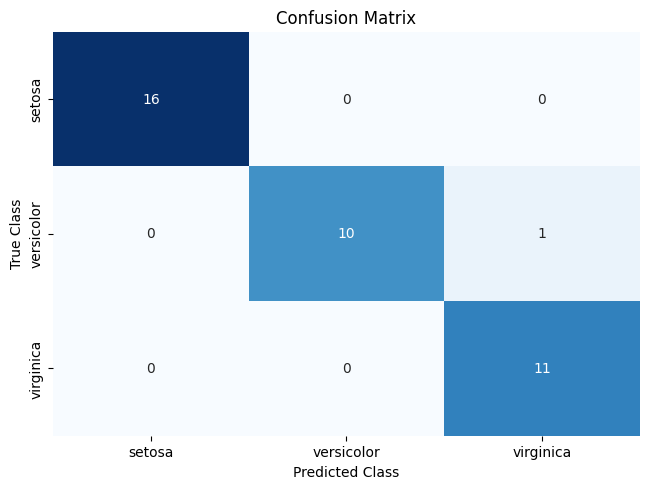

In [36]:
# 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# 데이터를 로드합니다.
iris = datasets.load_iris()

# 특성 행렬을 만듭니다.
features = iris.data

# 타깃 벡터를 만듭니다.
target = iris.target

# 클래스 이름의 리스트를 만듭니다.
class_names = iris.target_names

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=2)

# 로지스틱 회귀 모델을 만듭니다.
classifier = LogisticRegression(max_iter=1000)

# 모델을 훈련하고 예측 결과를 계산합니다.
target_predicted = classifier.fit(features_train,
    target_train).predict(features_test)

# 오차 행렬을 만듭니다.
matrix = confusion_matrix(target_test, target_predicted)

# 판다스 데이터프레임을 만듭니다.
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# 히트맵을 만듭니다.
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### 붙임

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(target_test, target_predicted)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]])

## 11.8 회귀 모델 평가하기

In [38]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 50,
                                   coef = False,
                                   random_state = 1)

# 선형 회귀 모델을 만듭니다.
ols = LinearRegression()

# 음의 MSE를 사용한 교차검증을 수행합니다.
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [39]:
# R^2를 사용한 교차검증을 수행합니다.
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

## 11.9 군집 모델 평가

In [40]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 특성 행렬을 생성합니다.
features, _ = make_blobs(n_samples = 1000,
                         n_features = 10,
                         centers = 2,
                         cluster_std = 0.5,
                         shuffle = True,
                         random_state = 1)

# k-평균을 사용하여 데이터를 클러스터링하고 클래스를 예측합니다.
model = KMeans(n_clusters=2, random_state=1).fit(features)

# 예측된 클래스
target_predicted = model.labels_

# 모델을 평가합니다.
silhouette_score(features, target_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.8916265564072141

## 11.10 사용자 정의 평가 지표 만들기

In [41]:
# 라이브러리를 임포트합니다.
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   random_state = 1)

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
     features, target, test_size=0.10, random_state=1)

# 사용자 정의 지표를 만듭니다.
def custom_metric(target_test, target_predicted):
    # R^2 점수를 계산합니다.
    r2 = r2_score(target_test, target_predicted)
    # R^2 점수를 반환합니다.
    return r2

# 높은 점수가 좋은 것을 나타내는 스코어 함수를 만듭니다.
score = make_scorer(custom_metric, greater_is_better=True)

# 릿지(ridge) 회귀 모델을 만듭니다.
classifier = Ridge()

# 릿지 회귀 모델을 훈련합니다.
model = classifier.fit(features_train, target_train)

# 사용자 정의 스코어 함수를 적용합니다.
score(model, features_test, target_test)

0.9997906102882058

In [42]:
# 예측
target_predicted = model.predict(features_test)

# R^2 점수를 계산합니다.
r2_score(target_test, target_predicted)

0.9997906102882058

## 11.11 훈련 세트 크기에 따른 영향을 시각화하기

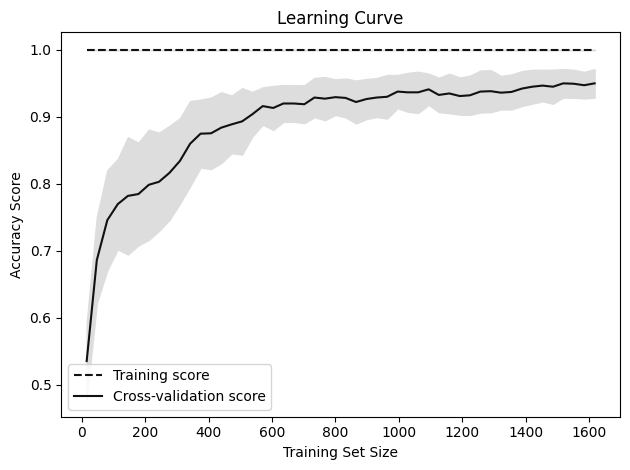

In [43]:
# 라이브러리를 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# 데이터를 로드합니다.
digits = load_digits()

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = digits.data, digits.target

# 다양한 훈련 세트 크기에서 교차검증 훈련 점수와 테스트 점수를 계산합니다.
train_sizes, train_scores, test_scores = learning_curve(# 분류기
                                                        RandomForestClassifier(),
                                                        # 특성 행렬
                                                        features,
                                                        # 타깃 벡터
                                                        target,
                                                        # 폴드 수
                                                        cv=10,
                                                        # 성능 지표
                                                        scoring='accuracy',
                                                        # 모든 코어 사용
                                                        n_jobs=-1,
                                                        # 50개의 훈련 세트 크기
                                                       train_sizes=np.linspace(
                                                       0.01,
                                                       1.0,
                                                       50))

# 훈련 세트 점수의 평균과 표준 편차를 계산합니다.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준 편차를 계산합니다.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 그래프를 그립니다.
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# 표준 편차 영역을 그립니다.
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color="#DDDDDD")

# 그래프를 출력합니다.
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## 11.12 평가 지표 리포트 만들기

In [44]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터를 로드합니다.
iris = datasets.load_iris()

# 특성 행렬을 만듭니다.
features = iris.data

# 타깃 벡터를 만듭니다.
target = iris.target

# 타깃 클래스 이름의 리스트를 만듭니다.
class_names = iris.target_names

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=2)

# 로지스틱 회귀 모델을 만듭니다.
classifier = LogisticRegression()

# 모델을 훈련하고 예측을 만듭니다.
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

# 분류 리포트를 만듭니다.
print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



### 붙임

In [45]:
# 분류 리포트를 만듭니다.
print(classification_report(target_test,
                            target_predicted,
                            labels=[0,1,2,3],
                            zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11
           3       0.00      0.00      0.00         0

   micro avg       0.97      0.97      0.97        38
   macro avg       0.73      0.73      0.73        38
weighted avg       0.98      0.97      0.97        38



## 11.13 하이퍼파라미터 값의 영향을 시각화하기

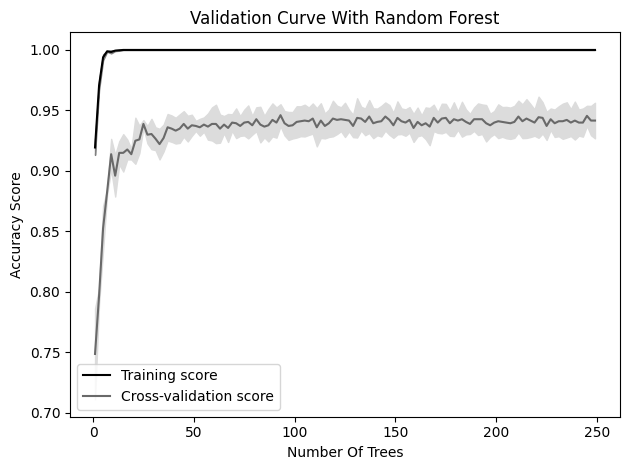

In [46]:
# 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# 데이터를 로드합니다.
digits = load_digits()

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = digits.data, digits.target

# 파라미터 값의 범위를 만듭니다.
param_range = np.arange(1, 250, 2)

# 파라미터 값의 범위를 사용하여 훈련 세트와 테스트 세트의 정확도를 계산합니다.
train_scores, test_scores = validation_curve(
    # 분류기
    RandomForestClassifier(),
    # 특성 행렬
    features,
    # 타깃 벡터
    target,
    # 조사할 하이퍼파라미터
    param_name="n_estimators",
    # 하이퍼파라미터 값의 범위
    param_range=param_range,
    # 폴드 수
    cv=3,
    # 성능 지표
    scoring="accuracy",
    # 모든 코어 사용
    n_jobs=-1)

# 훈련 세트 점수의 평균과 표준 편차를 계산합니다.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준 편차를 계산합니다.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 훈련 세트와 테스트 세트의 평균 정확도 점수를 그래프로 그립니다.
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# 훈련 세트와 테스트 세트의 정확도에 대한 표준 편차를 그래프로 그립니다.
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# 그래프를 출력합니다.
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()